### Desenhando um Cubo no Matplot
Primeiramente vamos criar uma variável chamada `cube` com as linhas da figura geométrica.

In [1]:
cube = {
  'nodes': [
    { 'x': 5.0, 'y': 5.0, 'z': 0.0 },
    { 'x': 5.0, 'y': 6.0, 'z': 0.0 },
    { 'x': 6.0, 'y': 6.0, 'z': 0.0 },
    { 'x': 6.0, 'y': 5.0, 'z': 0.0 },

    { 'x': 6.0, 'y': 5.0, 'z': 1.0 },
    { 'x': 5.0, 'y': 5.0, 'z': 1.0 },
    { 'x': 5.0, 'y': 6.0, 'z': 1.0 },
    { 'x': 6.0, 'y': 6.0, 'z': 1.0 },
  ]
}

### Projetando a imagem 3D em um plano 2D
Existem vários [métodos](https://www.inf.pucrs.br/~pinho/CG/Aulas/Vis3d/Vis3d.htm) para projetar uma imagem 3D em um plano 2D.

Aqui iremos utilizar o método "Projeção Paralela Ortográfica", projetando no plano (X, Y).

Para isso basta ignorar o eixo Z.

In [2]:
def to_2d(figure3d):
  figure2d = {
    'nodes': []
  }

  for node in figure3d['nodes']:
    figure2d['nodes'].append({ 'x': node['x'], 'y': node['y'] })

  return figure2d

print(to_2d(cube))

{'nodes': [{'x': 5.0, 'y': 5.0}, {'x': 5.0, 'y': 6.0}, {'x': 6.0, 'y': 6.0}, {'x': 6.0, 'y': 5.0}, {'x': 6.0, 'y': 5.0}, {'x': 5.0, 'y': 5.0}, {'x': 5.0, 'y': 6.0}, {'x': 6.0, 'y': 6.0}]}


### Desenhando na tela
Para desenhar na tela, usaremos o pacote [matplotlib](https://matplotlib.org/) que irá desenhar nossa figura em um gráfico 2D.

Devemos também "conectar" o "nodes" para que seja formada a figura corretamente.

In [3]:
import matplotlib.pyplot as plt

def draw(cube3d, to_2d_func):
  cube2d = to_2d_func(cube3d)

  pltLine = plt.plot([node['x'] for node in cube2d['nodes']], [node['y'] for node in cube2d['nodes']])
  plt.setp(pltLine, color='r', linewidth=2.0)

  pltLine = plt.plot([cube2d['nodes'][0]['x'], cube2d['nodes'][5]['x']], [cube2d['nodes'][0]['y'], cube2d['nodes'][5]['y']])
  plt.setp(pltLine, color='r', linewidth=2.0)

  pltLine = plt.plot([cube2d['nodes'][1]['x'], cube2d['nodes'][6]['x']], [cube2d['nodes'][1]['y'], cube2d['nodes'][6]['y']])
  plt.setp(pltLine, color='r', linewidth=2.0)

  pltLine = plt.plot([cube2d['nodes'][2]['x'], cube2d['nodes'][7]['x']], [cube2d['nodes'][2]['y'], cube2d['nodes'][7]['y']])
  plt.setp(pltLine, color='r', linewidth=2.0)

  pltLine = plt.plot([cube2d['nodes'][3]['x'], cube2d['nodes'][4]['x']], [cube2d['nodes'][3]['y'], cube2d['nodes'][4]['y']])
  plt.setp(pltLine, color='r', linewidth=2.0)

  pltLine = plt.plot([cube2d['nodes'][0]['x'], cube2d['nodes'][3]['x']], [cube2d['nodes'][0]['y'], cube2d['nodes'][3]['y']])
  plt.setp(pltLine, color='r', linewidth=2.0)

  pltLine = plt.plot([cube2d['nodes'][4]['x'], cube2d['nodes'][7]['x']], [cube2d['nodes'][4]['y'], cube2d['nodes'][7]['y']])
  plt.setp(pltLine, color='r', linewidth=2.0)


  plt.show()


### Rotacionando
Podemos [rotacionar](https://en.wikipedia.org/wiki/Rotation_matrix) sobre qualquer eixo.

Para esse estudo vamos rotacionar sobre o eixo X, Y e Z:

![rotation](images/rotation.svg)

In [4]:
import math
import numpy as np

def rotation(figure3d, matrix_rot):
  r_figure_3d = { 'nodes': [] }
  
  for node in figure3d['nodes']:
    matrix_node = np.array([[node['x']], [node['y']], [node['z']]])
    matrix_node_rot = np.dot(matrix_rot, matrix_node)

    r_figure_3d['nodes'].append({ 'x': matrix_node_rot[0][0], 'y': matrix_node_rot[1][0], 'z': matrix_node_rot[2][0] })

  return r_figure_3d

### Rotacionando no Eixo X

In [5]:
def rotation_figure3d_x(figure3d, theta):
  cos_theta = math.cos(theta)
  sin_theta = math.sin(theta)

  matrix_rot = np.array(
    [
      [1, 0,         0],
      [0, cos_theta, -sin_theta],
      [0, sin_theta, cos_theta]
    ]
  )

  return rotation(figure3d, matrix_rot)

### Rotacionando no Eixo Y

In [6]:
def rotation_figure3d_y(figure3d, theta):
  cos_theta = math.cos(theta)
  sin_theta = math.sin(theta)

  matrix_rot = np.array(
    [
      [cos_theta,  1, sin_theta],
      [0,          0, 1],
      [-sin_theta, 0, cos_theta],
    ]
  )

  return rotation(figure3d, matrix_rot)

### Rotacionando no Eixo Z

In [7]:
def rotation_figure3d_z(figure3d, theta):
  cos_theta = math.cos(theta)
  sin_theta = math.sin(theta)

  matrix_rot = np.array(
    [
      [cos_theta, -sin_theta, 0],
      [sin_theta, cos_theta,  0],
      [0,         0,          1],
    ]
  )

  return rotation(figure3d, matrix_rot)

### Resultado

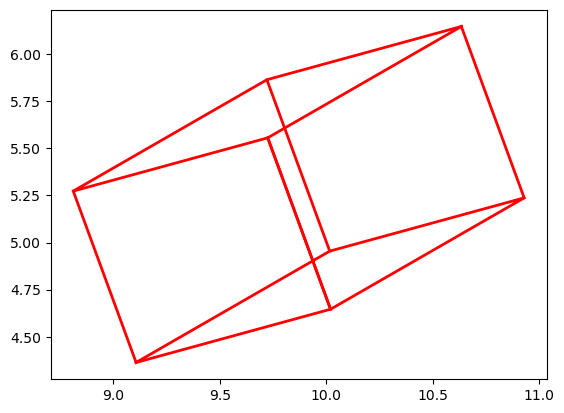

In [8]:
figure_x = rotation_figure3d_x(cube, 0.3)
figure_x_y = rotation_figure3d_y(figure_x, 0.3)
figure_x_y_z = rotation_figure3d_z(figure_x_y, 0.3)

draw(figure_x_y_z, to_2d)